In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, accuracy_score ,precision_recall_curve

In [100]:
dat = pd.read_csv("students.csv")
dat.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [104]:
dat.drop(dat[dat['Target'] == 'Enrolled'].index, inplace=True)
dat.drop(dat[(dat['Curricular units 2nd sem (grade)']==0 ) & (dat['Target']=='Graduate')].index, inplace=True)
dat.drop(dat[(dat['Curricular units 1st sem (grade)']==0 ) & (dat['Target']=='Graduate')].index, inplace=True)
dat.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3553.000000,3553.000000,3553.000000,3553.00000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,...,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000
mean,1.188010,6.883760,1.751478,10.10470,0.885167,2.573037,1.240360,12.602589,16.735716,7.225443,...,0.130312,0.594427,6.430059,7.926822,4.613847,10.246329,0.144666,11.632451,1.234196,-0.007366
std,0.618868,5.247023,1.337854,4.22925,0.318865,3.973423,1.691487,9.013798,10.975208,3.723722,...,0.681286,2.042659,2.091978,3.841048,3.126833,5.340846,0.755170,2.672396,1.382831,2.265607
min,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.00000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.857143,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,11.00000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.00000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,6.000000,17.00000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Students Graduate and Dropout count based on Unemployment Rate, GDP, Inflation rate 

In [6]:
unemployment = dat.groupby(['Unemployment rate', 'Target'])['Marital status'].count().reset_index(name='count')
gdp=dat.groupby(['GDP', 'Target'])['Marital status'].count().reset_index(name='count')
inflation=dat.groupby(['Inflation rate', 'Target'])['Marital status'].count().reset_index(name='count')

In [9]:
def create_bar_chart(df, x_col, y_col):
    fig = px.bar(df, 
                 x=x_col, 
                 y=y_col, 
                 color='Target',
                 pattern_shape='Target')
    fig.show()
create_bar_chart(unemployment, 'Unemployment rate', 'count')
create_bar_chart(gdp, 'GDP', 'count')
create_bar_chart(inflation, 'Inflation rate', 'count')    

In [28]:
gender=dat.groupby(['Gender','Target']).count()
gender = gender.iloc[:, :1]
gender = gender.rename(columns={'Marital status':'count'})
gender

count
Gender Target         
0      Dropout     720
       Graduate   1627
1      Dropout     701
       Graduate    505

In [32]:
ms = dat.groupby(['Marital status','Target']).count()
ms = ms.iloc[:, :1]
ms = ms.rename(columns={'Application mode':'count'})
ms

count
Marital status Target         
1              Dropout    1184
               Graduate   1939
2              Dropout     179
               Graduate    147
3              Dropout       1
               Graduate      1
4              Dropout      42
               Graduate     33
5              Dropout      11
               Graduate     11
6              Dropout       4
               Graduate      1

In [35]:
age=dat.groupby(['Age at enrollment', 'Target'])['Marital status'].count().reset_index(name='count')

In [97]:
import plotly.graph_objects as go

def generate_pie_chart(df, column_name):
    labels = df.index
    values = df[column_name]

    fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=0.32,
                                 sort=True, textinfo='label+percent', textposition='inside',
                                 hoverinfo='label+percent+value',direction='clockwise', rotation=90,  pull=[0.05 if i == 'Others' else 0 for i in labels],
                                 opacity=0.9, showlegend=True)])

    fig.update_traces(texttemplate='%{label} (%{value})', textposition='inside', textinfo='percent+label',
                      marker=dict(colors=px.colors.qualitative.Pastel1, line=dict(color='white', width=1)),
                      pull=[0.05 if i == 'Others' else 0 for i in labels], hoverinfo='label+percent+value')
    
    #The title_x parameter specifies the position of the title on the x-axis. 
    fig.update_layout(showlegend=True, legend=dict(x=0, y=1, orientation='v'))
    
    fig.show()

Graduate and Droupout count based on gender. Male=0, Female=1

In [98]:
generate_pie_chart(gender,'count')

Graduate and Droupout count based on Marital status.

Unmarried=1, Married=2, Divorced=3, Seperated=4, Widowed = 5, Registered partner = 6.


In [99]:
generate_pie_chart(ms,'count')

In [122]:
fig = px.scatter(age, x='Age at enrollment', y='count', color='Target')

# Set plot title and axis labels
fig.update_layout(title='Graduate and Droupout count based on Age at enrollment.', xaxis_title='GDP', yaxis_title='Count',)
# Show the plot
fig.show()

Apply Decion Tree Classifer ML model on data and find best scenario to predict future data. 

In [129]:
X = pd.get_dummies(dat.iloc[:,[3,4,5,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30]])
y = dat['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=10)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("score:",clf.score(X,y))
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("Precision Score: ", precision_score(y_test, y_pred,average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred,average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred,average='micro'))
print("Depth of the tree: ",clf.get_depth())

score: 0.9569377990430622
Cross-validation scores:  [0.84357073 0.85376388 0.83932269 0.86003291 0.83779779]
Average cross-validation score:  0.8468976012706848
0.85 accuracy with a standard deviation of 0.01
Precision Score:  0.8564727954971857
Recall Score:  0.8564727954971857
F1 Score:  0.8564727954971857
Depth of the tree:  23


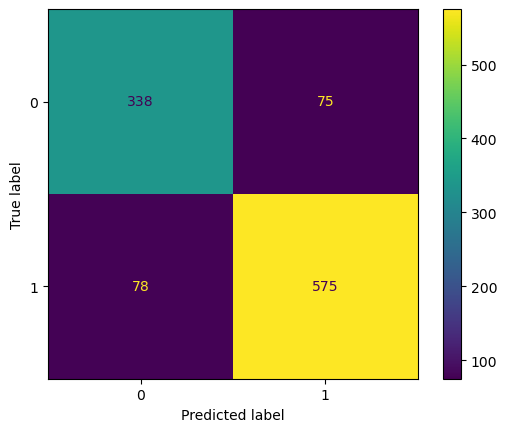

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [125]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_test_binary = y_test.map({'Dropout': 0, 'Graduate': 1})

y_test_binary = le.fit_transform(y_test)

# 2. Use your trained model to predict the probabilities of your test data.
y_pred_proba = clf.predict_proba(X_test)[:, 1]


# 4. Iterate through the sorted test data and compute the precision and recall for each threshold.
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_proba)

# 5. Plot the precision-recall curve using the computed precision and recall for each threshold.
fig = go.Figure(data=go.Scatter(x=recall, y=precision))
fig.update_layout(title="Precision-Recall Curve for Decision Tree Classifier",
                  xaxis_title="Recall",
                  yaxis_title="Precision",
                  width=800, height=500)
fig.show()

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
X = pd.get_dummies(dat.iloc[:,[3,4,5,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30]])
y = dat['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7, random_state=10)

rfc = RandomForestClassifier(max_depth=10, random_state=0)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
rfc.score(X,y)
print("score:",rfc.score(X,y))
scores = cross_val_score(rfc, X, y, cv=5, scoring='f1_macro')
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("Precision Score: ", precision_score(y_test, y_pred,average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred,average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred,average='micro'))

score: 0.9403321137067268
Cross-validation scores:  [0.89362231 0.89961542 0.90303617 0.88755147 0.90609187]
Average cross-validation score:  0.8979834479195258
0.90 accuracy with a standard deviation of 0.01
Precision Score:  0.9043151969981238
Recall Score:  0.9043151969981238
F1 Score:  0.9043151969981238


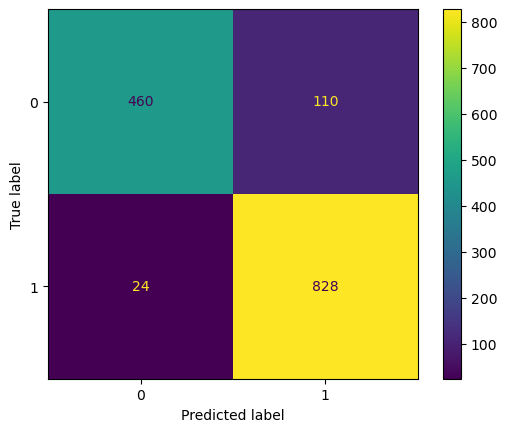

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()